In [1]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import re

3.5.2 |Anaconda 4.1.1 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
1.11.1
0.18.1


### Question 1
How likely is it that a basket of commercially available food items is going to meet recommended levels of nutrients while staying within recommended calorie allowance?

In [2]:
df = pd.read_csv("random_days.tsv", sep = '\t')
#the datafields are quite long; tell pandas to show the whole fields
pd.set_option('display.max_colwidth', -1)
del df['Unnamed: 0']
df.head()

,total_calories,complete_micronutrients?,total_fat,total_saturated_fat,total_carbohydrates,total_fiber,total_sugar,total_protein,total_cholesterol_(mg),total_sodium_(mg),...,total_iron_(mg),codes,product_names,generic_names,categories,categories_tags,ingredients_texts,main_categories,fruits-vegetables-nuts_100g,nutrition-score-uk_100g
0,2616.284,False,122.300,60.533,356.49,13.567,253.51,22.406,54.17,3342.181890,...,3.295,"[51000012913, 5900344018141, 973458, 9542018054, 16000159105, 1389900, 27000378953, 22000011879, 12000151903, 99482405458]","['Bean with Bacon', 'Filety śledziowe w sosie musztardowym', 'Milk chocolate filled with caramel', 'Creme Brulee', 'Fruit Gushers Variety Pack', 'Organic Tomato Ketchup', 'Diced tomatoes, basil, garlic & oregano', 'Starburst Original', '1893 Ginger Cola', 'Organic apple juice']","['Bean with Bacon Soup', nan, nan, 'Milk chocolate with a caramelized sugar and cream filling', 'Fruit flavored snacks', nan, nan, 'Fruit Chews', 'Ginger Cola', nan]","['soups,Canned meals', nan, 'Milk chocolate filled with caramel', 'Sugary snacks,Chocolates,Milk chocolates', 'Sugary snacks', 'Groceries,Sauces,Tomato sauces,Ketchup', 'Canned tomatoes', 'Sugary snacks,Confectioneries,Candies', 'Beverages,Plant-based beverages,Carbonated drinks,Fruit-based beverages,Sodas,Fruit sodas,Sodas with exotic fruits,Sugared beverages', 'Apple juice']","['en:canned-foods,en:meals,en:soups,en:canned-meals', nan, 'en:milk-chocolate-filled-with-caramel', 'en:sugary-snacks,en:chocolates,en:milk-chocolates', 'en:sugary-snacks', 'en:groceries,en:sauces,en:tomato-sauces,en:ketchup', 'en:plant-based-foods-and-beverages,en:plant-based-foods,en:fruits-and-vegetables-based-foods,en:canned-foods,en:vegetables-based-foods,en:canned-plant-based-foods,en:canned-vegetables,en:tomatoes-and-tomato-products,en:canned-tomatoes', 'en:sugary-snacks,en:confectioneries,en:candies', 'en:beverages,en:plant-based-beverages,en:carbonated-drinks,en:fruit-based-beverages,en:sodas,en:fruit-sodas,en:sodas-with-exotic-fruits,en:sugared-beverages', 'en:beverages,en:plant-based-beverages,en:fruit-based-beverages,en:juices-and-nectars,en:fruit-juices-and-nectars,en:fruit-juices,en:apple-juices,en:non-alcoholic-beverages']","[nan, nan, nan, 'Sugar, cocoa butter, _milk_, milkfat, chocolate, _lactose, caramelized sugar, skim _milk_, crumbled wafer [_wheat_ flour, rice flour, sugar, leavening (sodium bicarbonate), palm oil], _soya_ lecithin (emulsifier), barley malt powder, artificial flavors. Milk chocolate contains: Cocoa solids 30% min., _Milk_ Solids 20% min.', 'Strawberry ingredients: Corn Syrup, Sugar, Pear Puree Concentrate, Modified Corn Starch, Fructose, Maltodextrin, Palm Oil, Glycerin. Contains 2% or less of : Cottonseed Oil, Grape Juice Concentrate, Carrageenan, Citric Acid, Monoglycerides, Sodium Citrate, Malic Acid, Vitamin C (ascorbic acid), Natural Flavor, Potassium Citrate, Agar-Agar, Red 40, Xanthan Gum. Tropical Ingredients : Corn Syrup, Sugar, Pear Puree Concentrate, Fructose, Modified Corn Starch, Maltodextrin, Palm Oil, Glycerin. Contains 2% or less of : Cottonseed Oil, Grape Juice Concentrate, Carrageenan, Citric Acid, Monoglycerides, Sodium Citrate, Malic Acid, Vitamin C (ascorbic acid), Natural Flavor, Potassium Citrate, Agar-Agar, Xanthan Gum, Color (red 40, blue 1, yellow 5, yellow 6).', nan, 'Tomatoes, tomato juice, less than 2% of: Sugar, salt, citric acid, calcium chloride, spices, dried basil, natural flavor, dried oregano, dried parsley flakes, garlic powder.', 'CORN SYRUP, SUGAR, HYDROGENATED PALM KERNEL OIL, FRUIT JUICE FROM CONCENTRATE (APPLE, LEMON, STRAWBERRY, ORANGE, CHERRY). LESS THAN 2% - CITRIC ACID, TAPIOCA DEXTRIN, GELATIN, MODIFIED CORN STARCH, NATURAL AND ARTIFICIAL FLAVORS, ASCORBIC ACID (VITAMIN C), COLORING (RED 40, YELLOW 5, YELLOW 6, BLUE 1)', 'carbonated water, sugar, caramel color, natural flavor, phosphoric acid, sodium citrate, caffeine, potassium sorbate (preserves freshness), modified food starch,, kola n

In [3]:
##get a quick shot of the macronutrients
df[['total_calories','total_fat', 'total_saturated_fat', 'total_carbohydrates', 'total_fiber', 'total_sugar', 'total_protein']].describe()

,total_calories,total_fat,total_saturated_fat,total_carbohydrates,total_fiber,total_sugar,total_protein
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2915.073874,136.271122,47.682588,356.491245,24.868441,152.386828,65.667199
std,637.433161,58.090969,26.586153,93.566278,13.127283,61.896888,23.821865
min,823.280000,3.200000,0.000000,55.180000,0.000000,8.080000,2.365000
25%,2470.752000,93.267500,28.709250,291.385000,15.563500,107.047500,48.662750
50%,2899.332000,129.425000,42.620000,354.220000,22.698500,147.285000,62.916500
75%,3349.925250,171.890000,61.300500,418.790000,31.663250,191.577500,80.457750
max,5592.860000,479.900000,220.480000,726.000000,114.107000,428.200000,197.970000


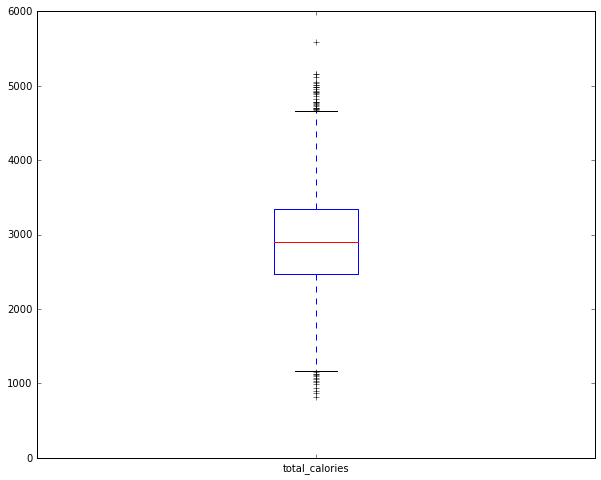

In [4]:
df['total_calories'].plot(kind = 'box', figsize=(10,8))

We can see that the majority of the calorie amounts are close around the median (the first and third quartile are hardly 900 calories apart) and we can see a long tail on both ends.  If this translates into a histogram approximating the normal curve, we can say this data is normal enough for a student-T statistical analysis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117166358>]], dtype=object)

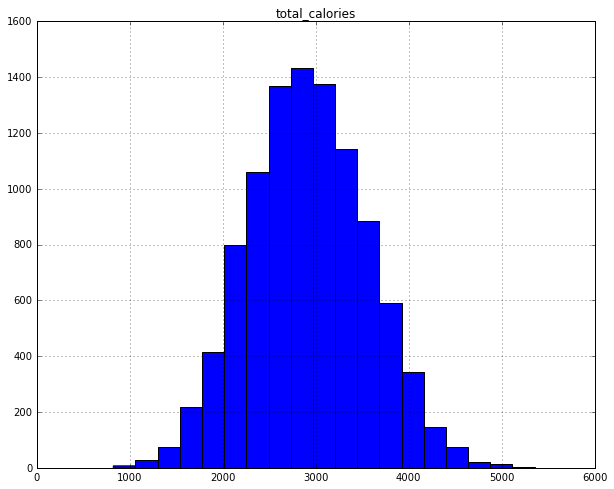

In [5]:
df.hist('total_calories', bins = 20, figsize=(10,8))

In [6]:
###check the skew
import scipy.stats
scipy.stats.skew(df['total_calories'])

0.1028769620525793

The histogram for calories follows the normal curve of standard statistcal distributions.  Since calories is a calculated field from carbohydrates, fat, and protein, we know that they are also going to have a normal shaped histogram.  When we calculate the skewness of the data, we can see that is it close to zero, with a slight skew towards the higher end.  Shew calculations range between [-1,1], and a skew of zero means there is no skew in the data.  This is good, as it shows that our data is very regular and good for further statistical analysis.

In [7]:
### get a quick shot of the micronutrients
df[['total_cholesterol_(mg)',
 'total_sodium_(mg)',
 'total_potassium_(mg)',
 'total_vitamin-a_(mcg)',
 'total_vitamin-c_(mg)',
 'total_calcium_(mg)',
 'total_iron_(mg)']].describe()

,total_cholesterol_(mg),total_sodium_(mg),total_potassium_(mg),total_vitamin-a_(mcg),total_vitamin-c_(mg),total_calcium_(mg),total_iron_(mg)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,139.260431,4709.403828,613.663790,868.329880,42.305719,665.865436,17.423480
std,131.133053,5621.807131,2291.781088,1147.411306,46.360955,466.921131,12.489114
min,0.000000,286.690000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.635000,2671.715000,50.000000,272.375000,11.038000,327.275000,8.820000
50%,106.555000,3648.740000,248.700000,601.000000,30.000000,548.400000,13.323000
75%,191.125000,4846.509252,575.000000,1107.250000,57.177500,893.407500,22.678500
max,1409.430000,85529.760000,27012.000000,13728.600000,392.400000,3926.000000,118.363000


In [8]:
list(df.columns)

['total_calories',
 'complete_micronutrients?',
 'total_fat',
 'total_saturated_fat',
 'total_carbohydrates',
 'total_fiber',
 'total_sugar',
 'total_protein',
 'total_cholesterol_(mg)',
 'total_sodium_(mg)',
 'total_potassium_(mg)',
 'total_vitamin-a_(mcg)',
 'total_vitamin-c_(mg)',
 'total_calcium_(mg)',
 'total_iron_(mg)',
 'codes',
 'product_names',
 'generic_names',
 'categories',
 'categories_tags',
 'ingredients_texts',
 'main_categories',
 'fruits-vegetables-nuts_100g',
 'nutrition-score-uk_100g']

In [9]:
df['complete_micronutrients?'].value_counts()

False    9894
True     106 
Name: complete_micronutrients?, dtype: int64

Of the 10,000 tests, we have found that relatively few days contain complete macronutrient data.  This implies that nutritional databases like this one are not always comprehensive.  This can cause consumer confusion. 